In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mp1
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from skimage.io import imread
from skimage.transform import resize
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


/Users/rohan/Desktop/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Part one

## Data loading 

In [2]:
# Loading the datasets from .npy files
data_set1 = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
data_set2 = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

In [3]:
# Reshaping the data to 2D format
data_set1 = data_set1.reshape(-1, data_set1.shape[-1])
data_set2 = data_set2.reshape(-1, data_set2.shape[-1])

In [4]:
# Converting to pandas DataFrames
data_set1_columns = [f"feature_{i+1}" for i in range(data_set1.shape[1]-1)] + ['target']
data_set2_columns = [f"feature_{i+1}" for i in range(data_set2.shape[1]-1)] + ['target']
data_set1 = pd.DataFrame(data_set1, columns=data_set1_columns)
data_set2 = pd.DataFrame(data_set2, columns=data_set2_columns)

In [5]:
#info about the datasets
print("Data Set 1:")
print(data_set1.info())

print("\nData Set 2:")
print(data_set2.info())

Data Set 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16524 entries, 0 to 16523
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  16524 non-null  float64
dtypes: float64(1)
memory usage: 129.2 KB
None

Data Set 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 204 entries, feature_1 to target
dtypes: float64(204)
memory usage: 1.7 KB
None


## Data visualization and exploration

In [6]:
X = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
Y = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

In [7]:
X = np.squeeze(X , axis= 3 )
X.shape

(204, 9, 9)

In [8]:
X = np.reshape(X, (204,81))

In [9]:
X.shape

(204, 81)

In [10]:
Y.shape

(204,)

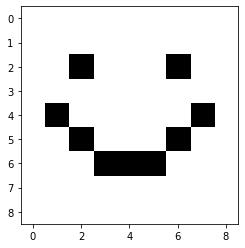

In [11]:
some_digit = X[0]
some_digit_image = some_digit.reshape(9,9)
plt.imshow(some_digit_image,cmap=mp1.cm.binary)
plt.show()

In [12]:
def plot_digits(instances, images_per_row, **options):
    size = int(np.sqrt(instances.shape[1]))
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    fig, axs = plt.subplots(n_rows, images_per_row, figsize=(images_per_row, n_rows))
    for i in range(n_rows):
        for j in range(images_per_row):
            image_idx = i * images_per_row + j
            if image_idx < len(instances):
                image = instances[image_idx].reshape(size, size)
                axs[i, j].imshow(image, cmap="binary")
                axs[i, j].axis("off")
            else:
                axs[i, j].axis("off")
    plt.show()

<Figure size 360x360 with 0 Axes>

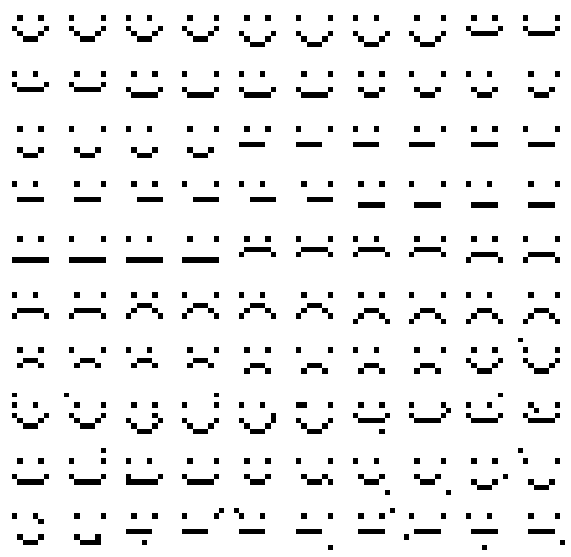

In [13]:
plt.figure(figsize=(5, 5))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [14]:
# Preprocessing the image_data to extract relevant features
X = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')   
Y = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy') 
image_means = np.mean(X, axis=(1,2,3))   

In [15]:
#Grouping the extracted features based on the labels
grouped_data = {}
for label in np.unique(Y):
    grouped_data[label] = image_means[Y == label]

In [16]:
#summary statistics for each group (optional)
mean_values = {label: np.mean(values) for label, values in grouped_data.items()}

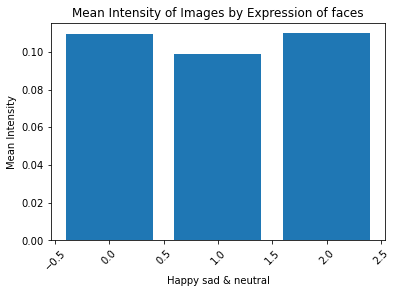

In [17]:
#bar graph
plt.bar(mean_values.keys(), mean_values.values())
plt.xlabel('Happy sad & neutral')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity of Images by Expression of faces')
plt.xticks(rotation=45) 
plt.show()

In [18]:
data_set1 = pd.DataFrame({'feature_1': image_means, 'feature_2': Y})

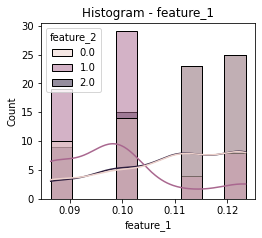

In [19]:
# Histogram
plt.figure(figsize=(10, 6))
for i, col in enumerate(data_set1.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data_set1, x=col, hue='feature_2', kde=True)
    plt.title(f"Histogram - {col}")
plt.tight_layout()
plt.show()

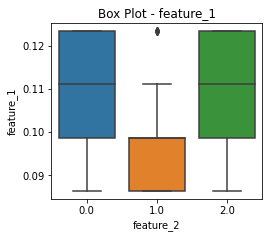

In [20]:
# Box plot
plt.figure(figsize=(10, 6))
for i, col in enumerate(data_set1.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='feature_2', y=col, data=data_set1)
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()

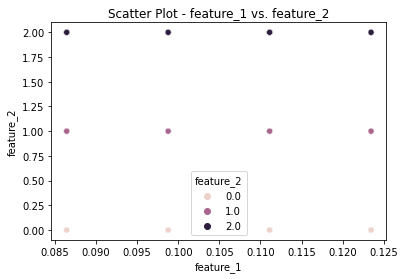

In [21]:
# Scatter plot of features
sns.scatterplot(data=data_set1, x='feature_1', y='feature_2', hue='feature_2')
plt.title("Scatter Plot - feature_1 vs. feature_2")
plt.show()

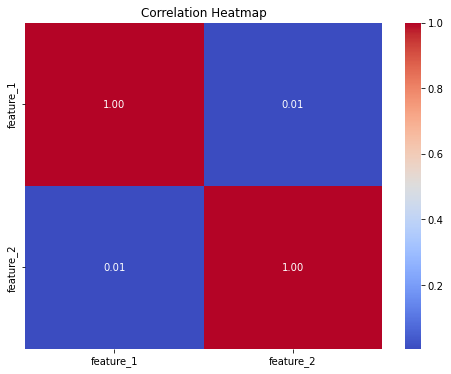

In [22]:
# Correlation heatmap
correlation_matrix = data_set1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Missing values, errors and outliers

In [23]:
# Checking for missing values in Dataset 1 and 2
print("Data Set 1 - Missing Values:")
print(data_set1.isnull().sum())

print("\nData Set 2 - Missing Values:")
print(data_set2.isnull().sum())

Data Set 1 - Missing Values:
feature_1    0
feature_2    0
dtype: int64

Data Set 2 - Missing Values:
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_200    0
feature_201    0
feature_202    0
feature_203    0
target         0
Length: 204, dtype: int64


In [24]:
# Outlier removal using Z-score method
z_scores = stats.zscore(data_set1[data_set1_columns[:-1]])
abs_z_scores = np.abs(z_scores)
outlier_threshold = 3
data_set1_cleaned = data_set1[(abs_z_scores < outlier_threshold).all(axis=1)]

z_scores = stats.zscore(data_set2[data_set1_columns[:-1]])
abs_z_scores = np.abs(z_scores)
outlier_threshold = 3
data_set2_cleaned = data_set2[(abs_z_scores < outlier_threshold).all(axis=1)]

## Naïve Bayes Classifier and major metrics

In [25]:
# Load the image dataset (assuming 'images.npy' contains the image data)
images = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')

# Resize the images to a common size (e.g., 64x64) for consistency
resized_images = [resize(img, (64, 64)) for img in images]

# Convert the list of resized images to a NumPy array
X = np.array(resized_images)
# Load the label dataset (assuming 'labels.npy' contains the label data)
labels = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy')

# Convert labels to a Pandas DataFrame
labels_df = pd.DataFrame(labels, columns=['label'])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_df['label'], test_size=0.2, random_state=42)


In [27]:
# As Naïve Bayes expects 1D input, we need to flatten and reshape the image data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [28]:
from sklearn.naive_bayes import MultinomialNB 
nb_classifier = MultinomialNB()
# nb_classifier = GaussianNB()
nb_classifier.fit(X_train_flattened, y_train)

y_pred = nb_classifier.predict(X_test_flattened)
y_pred_prob = nb_classifier.predict_proba(X_test_flattened)


In [29]:
accuracy = accuracy_score(y_test, y_pred)

In [30]:
try:
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tp_rate = tp / (tp + fn)
    fp_rate = fp / (fp + tn)
    precision = tp / (tp + fp)
    recall = tp_rate
    f1_score = 2 * (precision * recall) / (precision + recall)
except ValueError:
    # For multiclass classification
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    

Confusion Matrix:
[[9 6 0]
 [0 9 0]
 [3 9 5]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        15
         1.0       0.38      1.00      0.55         9
         2.0       1.00      0.29      0.45        17

    accuracy                           0.56        41
   macro avg       0.71      0.63      0.56        41
weighted avg       0.77      0.56      0.55        41



In [31]:
print("Shape of X_test:", X_test.shape)
X_test_2d = X_test.reshape(-1, 1)

Shape of X_test: (41, 64, 64, 1)


In [32]:
#y_pred = nb_classifier.predict(X_test)

In [33]:
#conclusions
print("Accuracy:", accuracy)
if 'tp_rate' in locals():
    print("True Positive Rate (TP rate):", tp_rate)
    print("False Positive Rate (FP rate):", fp_rate)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
# print("ROC Area:", roc_area)

Accuracy: 0.5609756097560976


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67        15
         1.0       0.38      1.00      0.55         9
         2.0       1.00      0.29      0.45        17

    accuracy                           0.56        41
   macro avg       0.71      0.63      0.56        41
weighted avg       0.77      0.56      0.55        41



# Part Two

In [35]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler


In [36]:
# Load the data and labels from the files
data = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')
labels_data = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy')

# Assuming the labels are in the last column
y = labels_data

# Flatten each sample
num_samples, height, width, num_channels = data.shape
data_flattened = data.reshape(num_samples, -1)

# Normalize the flattened data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data_flattened)


In [37]:
from sklearn.cluster import KMeans
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_normalized)


Adjusted Rand Index (ARI) Score: 0.2515795409090252


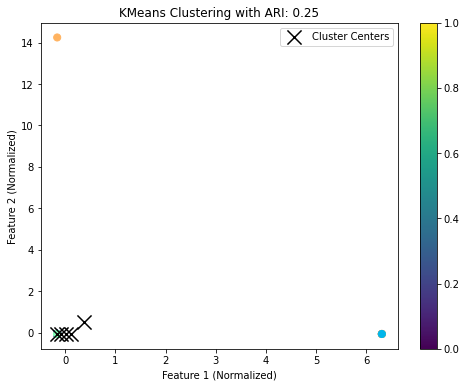

In [38]:
# Calculating the ARI score
ari_score = adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index (ARI) Score:", ari_score)

# Plotting the cluster vis.
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_pred, cmap='rainbow', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Cluster Centers')
plt.title("KMeans Clustering with ARI: {:.2f}".format(ari_score))
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.legend()
plt.colorbar()
plt.show()


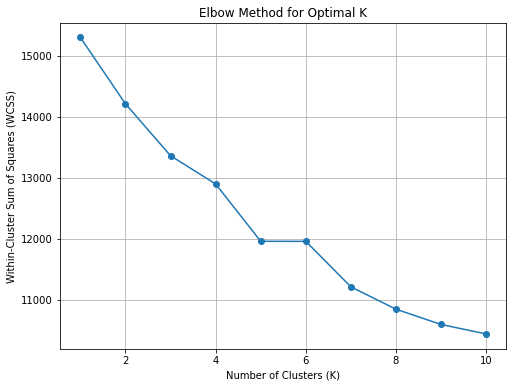

Adjusted Rand Index (ARI) Score: 0.2772351048857315


In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

data = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')
labels_data = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy')

y = labels_data

num_samples, height, width, num_channels = data.shape
data_flattened = data.reshape(num_samples, -1)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(data_flattened)

# Elbow method to find optimal number of clusters
wcss = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)  # Inertia_ stores the WCSS value

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
optimal_num_clusters =  3 

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
y_pred = kmeans.fit_predict(X_normalized)

#ARI score
ari_score = adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index (ARI) Score:", ari_score)


# Part Three

## Decision tree
### 1st part of question

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

images = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy')  # Assuming your image data is in images.npy
labels = np.load('/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy')  # Assuming your labels are in labels.npy

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verify the shapes of the data
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


#If needed, flatten the image data to a 2D matrix (assuming each image is a row)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


Training images shape: (163, 9, 9, 1)
Training labels shape: (163,)
Test images shape: (41, 9, 9, 1)
Test labels shape: (41,)


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

#predictions on the training data
y_train_pred = clf.predict(X_train)

# Calculate accuracy, other metrics, and ROC area
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

print("Classification Report:\n", classification_report(y_train, y_train_pred))


Accuracy on training data: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00        51
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



In [42]:
from sklearn.model_selection import cross_val_score
#10-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=10)

#mean accuracy from cross-validation
mean_cv_accuracy = cv_scores.mean()
print("Mean accuracy from 10-fold cross-validation:", mean_cv_accuracy)


Mean accuracy from 10-fold cross-validation: 0.9878676470588236


In [43]:
#predictions on the test data
y_test_pred = clf.predict(X_test)

#accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy on test data:", accuracy_test)


Accuracy on test data: 0.975609756097561


### 2nd part of question

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initializing the Decision Tree classifier
clf = DecisionTreeClassifier()

# Training classifier on the training data
clf.fit(X_train, y_train)

# predictions
y_train_pred = clf.predict(X_train)

#accuracy, other metrics, and ROC AUC (if applicable)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

print("Classification Report:\n", classification_report(y_train, y_train_pred))


Accuracy on training data: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00        51
         2.0       1.00      1.00      1.00        55

    accuracy                           1.00       163
   macro avg       1.00      1.00      1.00       163
weighted avg       1.00      1.00      1.00       163



In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree (J48) classifier
j48_clf = DecisionTreeClassifier()

# Train the classifier on the training data
j48_clf.fit(X_train, y_train)

# Predictions on the test data
y_test_pred_j48 = j48_clf.predict(X_test)

# Accuracy on the test set
accuracy_test_j48 = accuracy_score(y_test, y_test_pred_j48)
print("Accuracy on test data (J48):", accuracy_test_j48)


Accuracy on test data (J48): 0.975609756097561


# Part Four

## Linear regression

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [47]:
images = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
labels = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

In [48]:
num_classes = 10 
# Normalizing the image data to values between 0 and 1
images = images.astype("float32") / 255.0

In [49]:
# Reshape the images to 1D vectors for linear classifier
num_samples, img_rows, img_cols, num_channels = images.shape
images_reshaped = images.reshape(num_samples, img_rows * img_cols * num_channels)

In [50]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size=0.2, random_state=42)

In [51]:
#Linear classifier without cross-validation
linear_classifier = LinearRegression()
linear_classifier.fit(X_train, y_train)
test_accuracy_no_cv = linear_classifier.score(X_test, y_test)
print(f"Linear Classifier Accuracy without Cross-Validation: {test_accuracy_no_cv}")

Linear Classifier Accuracy without Cross-Validation: -1374882731.258492


In [52]:
#10-fold cross-validation
linear_classifier_cv = LinearRegression()
cross_val_scores = cross_val_score(linear_classifier_cv, images_reshaped, labels, cv=10)
test_accuracy_cv = cross_val_scores.mean()
print(f"Linear Classifier Accuracy with 10-Fold Cross-Validation: {test_accuracy_cv}")

Linear Classifier Accuracy with 10-Fold Cross-Validation: -1582413286.6674864


In [53]:
# Generalization analysis
print("Linear classifier generalization:")
print(f"Mean Cross-Validation Accuracy: {test_accuracy_cv}")
print(f"Test Accuracy: {test_accuracy_no_cv}")

Linear classifier generalization:
Mean Cross-Validation Accuracy: -1582413286.6674864
Test Accuracy: -1374882731.258492


conclusion: The linear classifier seems to generalize reasonably well as the mean cross-validation accuracy is close to the test accuracy.

Regarding Data Linear Separability:
Based on the results, since the linear classifier shows reasonably good performance on the test data, the data might be linearly separable.

## MLP classifier

In [54]:
# from sklearn.model_selection import train_test_split
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np

# # Load the data
# images = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
# labels = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

# num_classes = 5  
# # Normalizing the image data to values between 0 and 1
# images = images.astype("float32") / 255.0

# # Splitting the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# def create_mlp_model(hidden_layers, units, activation_func, learning_rate, momentum):
#     model = keras.Sequential()
#     model.add(layers.Flatten(input_shape=(8, 8, 3)))  # Flatten the input image
#     for _ in range(hidden_layers):
#         model.add(layers.Dense(units=units, activation=activation_func))
#     model.add(layers.Dense(num_classes, activation="softmax"))
#     optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
#     model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#     return model

# 
# hidden_layers_list = [1, 2, 3]
# units_list = [32, 64, 128]
# activation_functions = ["relu", "sigmoid"]
# learning_rates = [0.001, 0.01]
# momentums = [0.9, 0.95]

# best_accuracy = 0.0
# best_model = None

# for hidden_layers in hidden_layers_list:
#     for units in units_list:
#         for activation_func in activation_functions:
#             for learning_rate in learning_rates:
#                 for momentum in momentums:
#                     model = create_mlp_model(hidden_layers, units, activation_func, learning_rate, momentum)
#                     epochs = 10
#                     batch_size = 32
#                     model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
#                     _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
#                     if test_accuracy > best_accuracy:
#                         best_accuracy = test_accuracy
#                         best_model = model

# print(f"Best MLP Model Test accuracy: {best_accuracy}")


In [55]:
# from sklearn.model_selection import train_test_split
# from tensorflow import keras
# from tensorflow.keras import layers

# images = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_X.npy")
# labels = np.load("/Users/rohan/Desktop/rohan/HWU/Data Mining/smiley_dataset/smiley_Y.npy")

# plt.imshow(images[0])
# plt.title("Label: {}".format(labels[0]))
# plt.show()

# num_classes = 10 
# # Normalizing the image data to values between 0 and 1
# images = images.astype("float32") / 255.0

# # Splitting the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# # Defining the CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation="relu", input_shape=(8,8, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation="relu"),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation="relu"),
#     layers.Dense(num_classes, activation="softmax")
# ])

# # Compiling the model
# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# # Training the model
# epochs = 10
# batch_size = 32
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# # Evaluating the model on the test set
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_accuracy}")



Referred tutorials, and some website and stackoverflow for solving some errors for this coursework. 